In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10 as data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random


cnn = Sequential()
Lalpha=0.25
cnn.add(Conv2D(64, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha), input_shape = (32,32,3)))
cnn.add(Conv2D(64, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(128, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(Conv2D(128, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(256, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(Conv2D(256, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(Conv2D(256, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(512, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(Conv2D(512, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(Conv2D(512, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(1024, (3, 3), padding = 'same', activation = LeakyReLU(alpha=Lalpha)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dense(10, activation = 'softmax'))
cnn.compile(optimizer = 'adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])
cnn.summary()



(X_train, Y_train), (X_test, Y_test) = data.load_data()

num = int(round(len(X_train)*0.99))

train_image = X_train[:num].reshape(-1,32,32,3)
train_image = train_image.astype('float32') / 255 - 0.5

valid_image = X_train[num:].reshape(-1,32,32,3)
valid_image = valid_image.astype('float32') / 255 - 0.5

test_image = X_test.reshape(-1,32,32,3)
test_image = test_image.astype('float32') / 255 - 0.5

train_label = to_categorical(Y_train[:num])
valid_label = to_categorical(Y_train[num:])
test_label  = to_categorical(Y_test)

print(len(valid_image))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

Epoch 1/20
99/99 [==============================] - 36s 284ms/step - loss: 2.2501 - accuracy: 0.1452 - val_loss: 1.8975 - val_accuracy: 0.2540
Epoch 2/20
99/99 [==============================] - 29s 294ms/step - loss: 1.7371 - accuracy: 0.3267 - val_loss: 1.6318 - val_accuracy: 0.3880
Epoch 3/20
99/99 [==============================] - 29s 294ms/step - loss: 1.5489 - accuracy: 0.4092 - val_loss: 1.4928 - val_accuracy: 0.4740
Epoch 4/20
99/99 [==============================] - 29s 295ms/step - loss: 1.2438 - accuracy: 0.5438 - val_loss: 1.1851 - val_accuracy: 0.5840
Epoch 5/20
99/99 [==============================] - 29s 294ms/step - loss: 1.0505 - accuracy: 0.6196 - val_loss: 0.9440 - val_accuracy: 0.6620
Epoch 6/20
99/99 [==============================] - 29s 294ms/step - loss: 0.8704 - accuracy: 0.6896 - val_loss: 0.8435 - val_accuracy: 0.7120
Epoch 7/20
99/99 [==============================] - 29s 294ms/step - loss: 0.7258 - accuracy: 0.7447 - val_loss: 0.6746 - val_accuracy: 0.7740

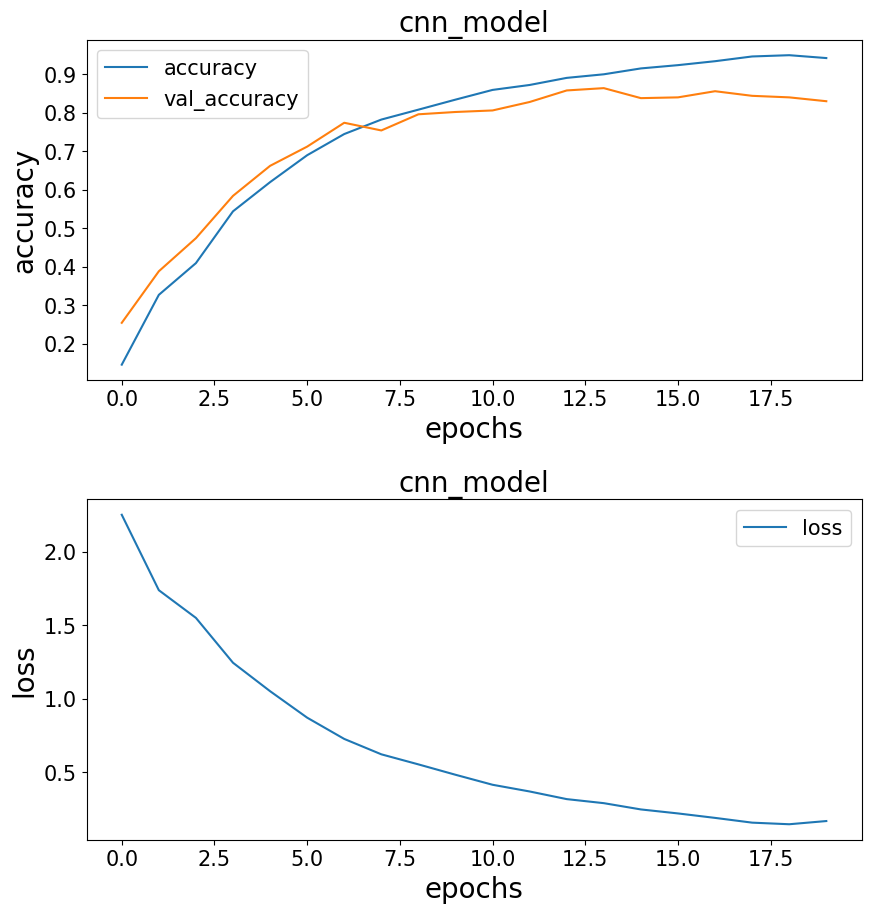

In [2]:

history = cnn.fit(train_image, train_label, epochs=20, batch_size =500, validation_data =(valid_image, valid_label), shuffle = 'True')
test_loss, test_acc = cnn.evaluate(test_image, test_label)
print('test_acc: {acc}'.format(acc=test_acc))


plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.125,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.35)
#
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("cnn_model", fontsize=20)
plt.xlabel("epochs", fontsize=20)
plt.ylabel("accuracy", fontsize=20)
plt.legend(['accuracy', 'val_accuracy'], fontsize=15)
#
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title("cnn_model", fontsize=20)
plt.xlabel("epochs", fontsize=20)
plt.ylabel("loss", fontsize=20)
plt.legend(['loss'], fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#commit
 

313/313 [==============================] - 3s 11ms/step


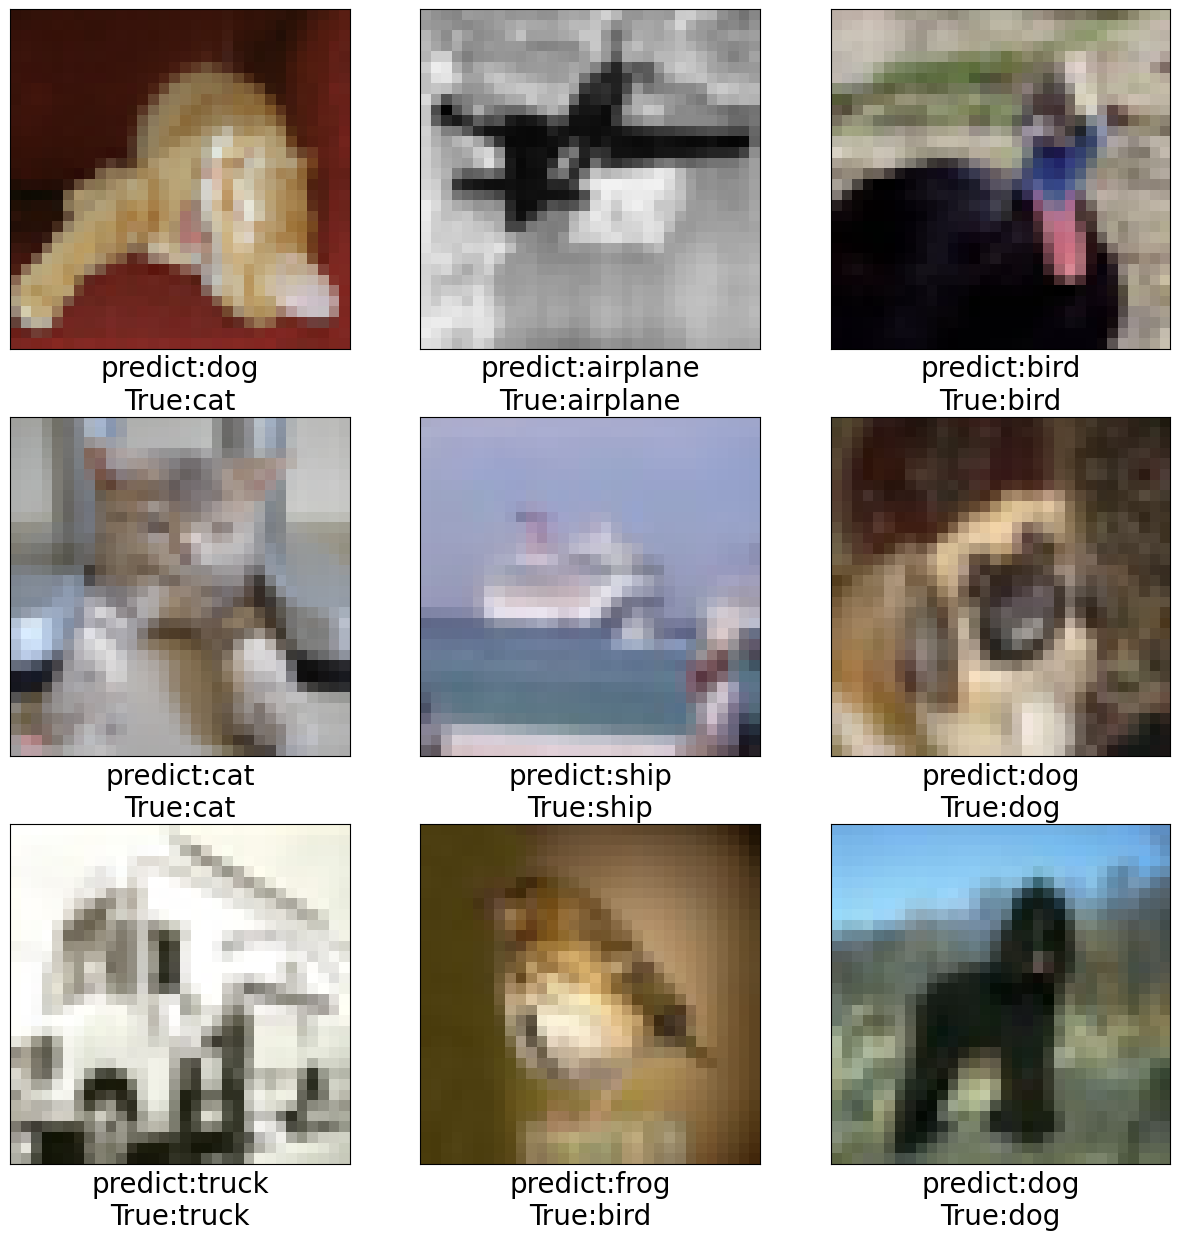

In [3]:
predict_test = cnn.predict(test_image)
prediction = np.argmax(predict_test, axis=1)
index = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    n = random.randint(0,10000)
    pred = index[prediction[n]]
    GroundTruth = index[int(np.array(Y_test)[n])]
    plt.imshow(X_test[n], cmap= plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('predict:{a}\nTrue:{b}'.format(a=pred,b=GroundTruth ), fontsize=20)
plt.show()
